<a href="https://colab.research.google.com/github/AxelleDomingues/Memoire-2/blob/main/Chapitre_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-821a47de3aa2>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)
<ipython-input-2-821a47de3aa2>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set(xticklabels = ([' ', '1200-1375', '1376-1532', '1533-1691', '1692-1840']))
<ipython-input-2-821a47de3aa2>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)
<ipython-input-2-821a47de3aa2>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set(xticklabels = ([' ', '1200-1375', '1376-1532', '1533-1691', '1692-1840']))


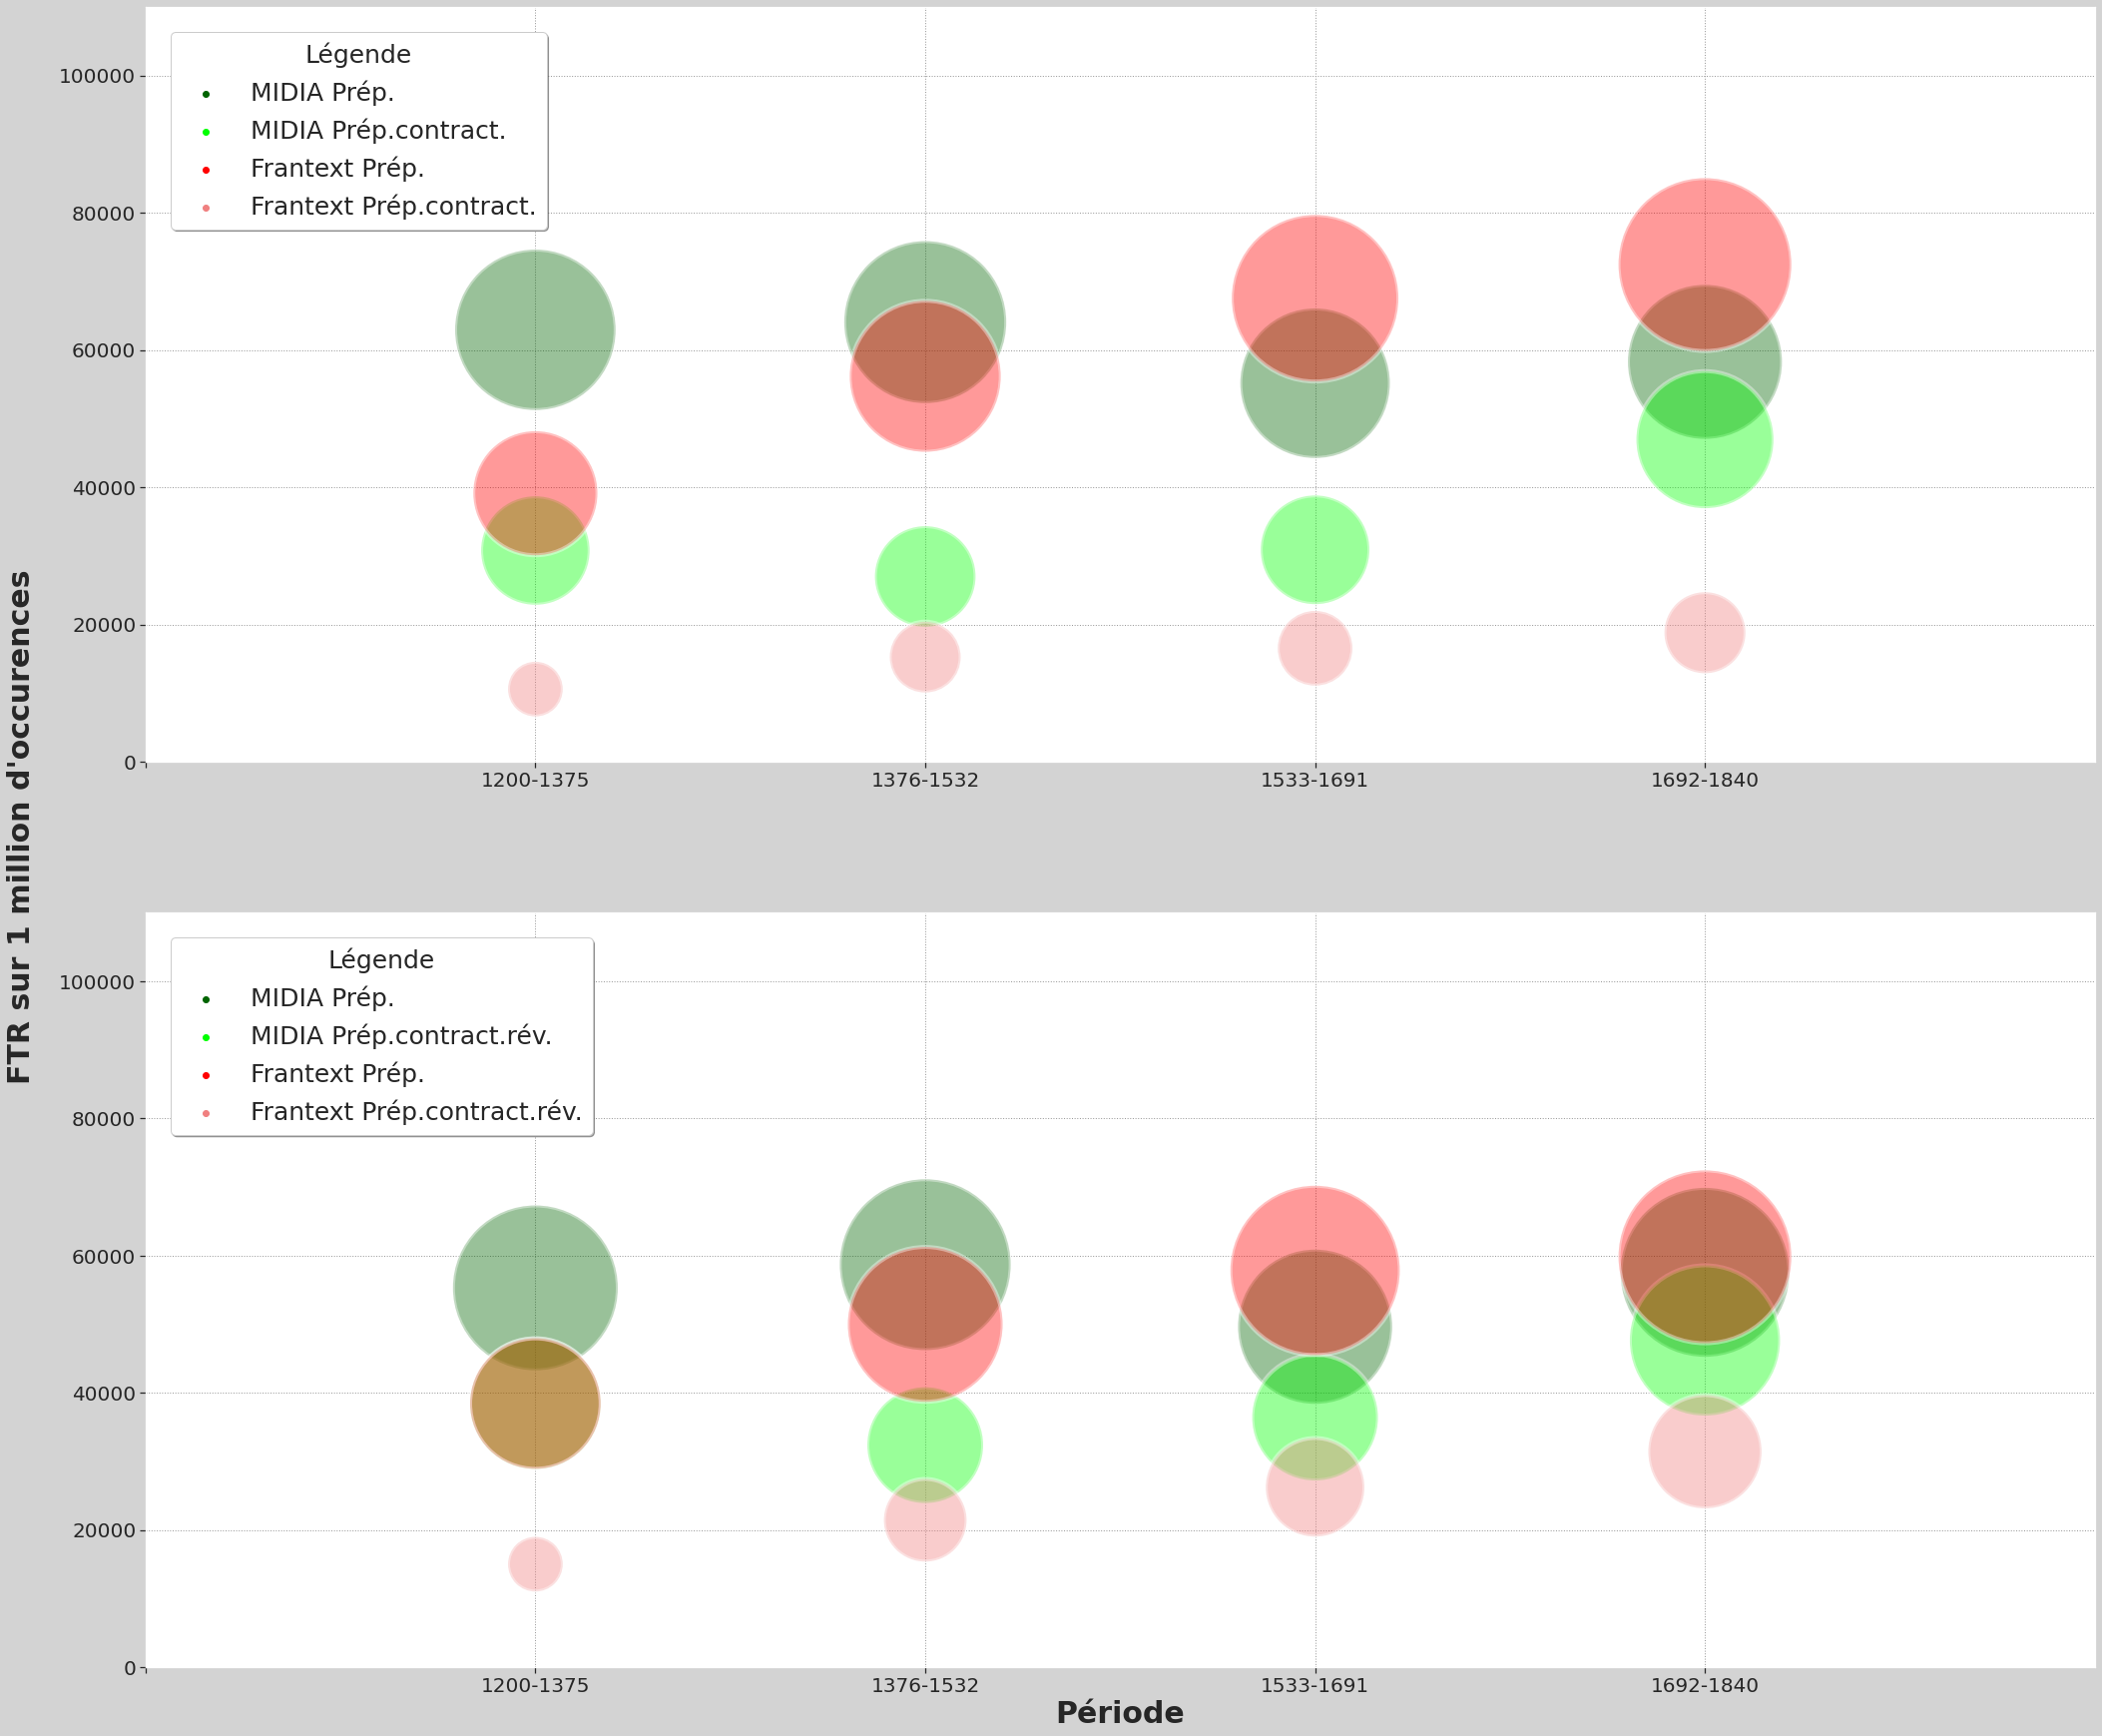

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("FTR1MPrepVsPrepContract.xlsx")
df1 = pd.read_excel("FTR1MPrepVsPrepContractRev.xlsx")
sns.set(rc={'figure.figsize':(35,30), 'grid.color':'0.6', 'grid.linestyle': ":", 'axes.facecolor':'white', 'figure.facecolor':'lightgrey', "figure.dpi":72, 'savefig.dpi':72})
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)
fig.text(0.07, 0.5, "FTR sur 1 million d'occurences", va='center', rotation='vertical', fontsize='30', fontweight='bold')

plt.subplot(2,1,1)
a = sns.scatterplot(data=df, x="  ", y="   ", linewidth=4, edgecolor="white", hue="Corpus", palette=["darkgreen", "lime", "red", "lightcoral"], size="   ", sizes=(3000, 30000), alpha=0.4, legend="full")
h,l = a.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],bbox_to_anchor=(0, 1), loc=2, borderaxespad=1, shadow=True, fancybox=True,  title ="Légende", fontsize = '25', title_fontsize = "25")

a.tick_params(bottom=True, left=True)
a.set(xticklabels = ([' ', '1200-1375', '1376-1532', '1533-1691', '1692-1840']))

#plt.xlabel('Période', fontsize=25, fontweight='bold')
#plt.ylabel("FTR sur 1M d'occurrences", fontsize=25, fontweight='bold')
plt.xticks((np.arange(0,5,1)), fontsize=20)
plt.yticks((np.arange(0,110000,20000)), fontsize=20)
plt.xlim(0,5)
plt.ylim(0,110000)
yticklabel=False

plt.subplot(2,1,2)
a = sns.scatterplot(data=df1, x="  ", y="   ", linewidth=4, edgecolor="white", hue="Corpus", palette=["darkgreen", "lime", "red", "lightcoral"], size="   ", sizes=(3000, 30000), alpha=0.4, legend="full")
h,l = a.get_legend_handles_labels()
plt.legend(h[1:5],l[1:5],bbox_to_anchor=(0, 1), loc=2, borderaxespad=1, shadow=True, fancybox=True,  title ="Légende", fontsize = '25', title_fontsize = "25")

a.tick_params(bottom=True, left=True)
a.set(xticklabels = ([' ', '1200-1375', '1376-1532', '1533-1691', '1692-1840']))

plt.xlabel('Période', fontsize=30, fontweight='bold')
#plt.ylabel("FTR sur 1M d'occurrences", fontsize=25, fontweight='bold')
plt.xticks((np.arange(0,5,1)), fontsize=20)
plt.yticks((np.arange(0,110000,20000)), fontsize=20)
plt.xlim(0,5)
plt.ylim(0,110000)
yticklabel=False

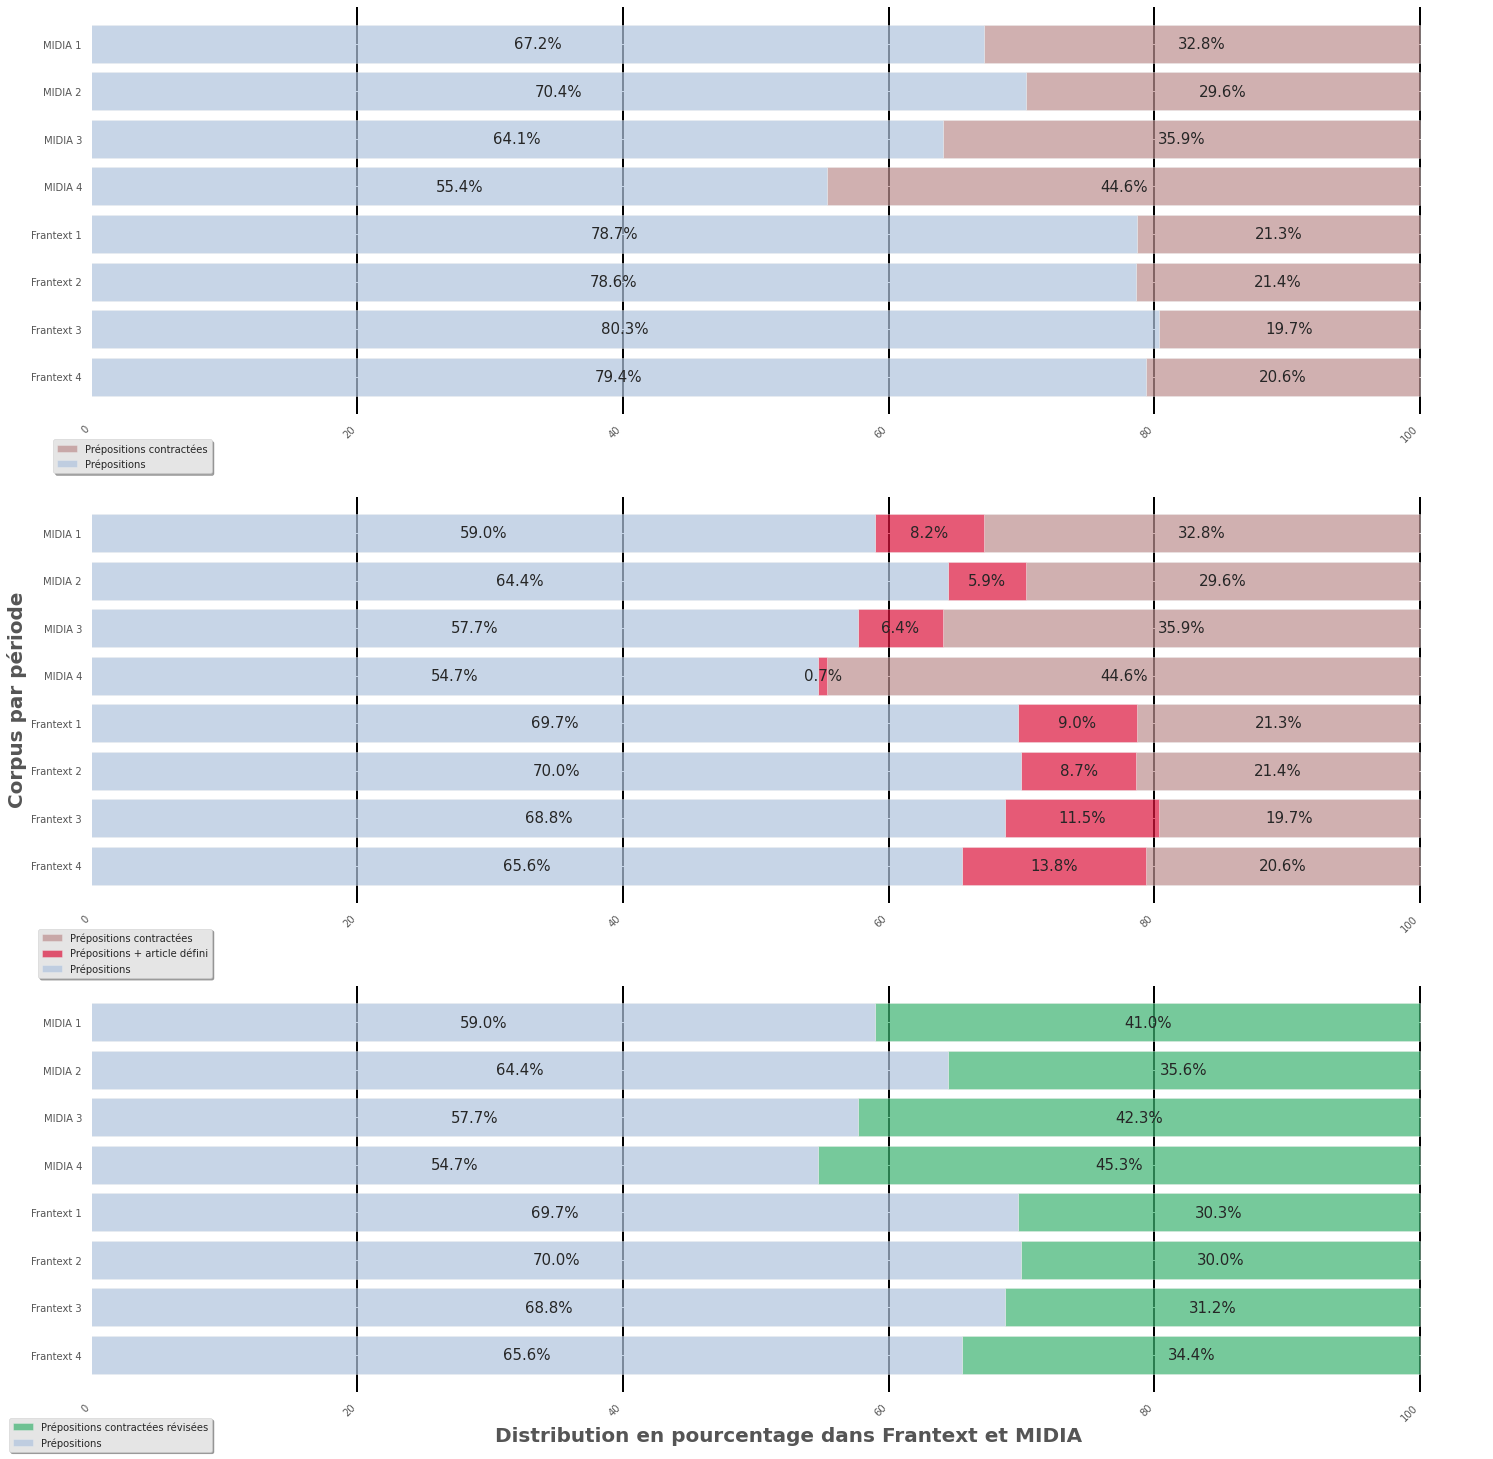

In [4]:
#impot libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

#main figure settings
plt.style.use('ggplot')
plt.figure(figsize=(5,25), dpi=(72))

plt.subplot(3,1,1)

#import the data
df1 = pd.read_excel("Propor1PrepVsArtprep.xlsx")

#populate the variables from the xlsx dataframe
Corpus = df1.Corpus
PREP = df1.Prépositions
ARTPREP = df1.Prépositionscontractées

ind = [x for x, _ in enumerate(Corpus)]

#calculate percentages for the 100% stacked bars
total = PREP+ARTPREP
proportion_PREP = np.true_divide(PREP, total) * 100
proportion_ARTPREP = np.true_divide(ARTPREP, total) * 100

plt.subplots_adjust(right=4)

#plot and modify the bars
plt.barh(ind, proportion_ARTPREP, label='Prépositions contractées', color='rosybrown', left=proportion_PREP, alpha=0.7)
plt.barh(ind, proportion_PREP, label='Prépositions', color='lightsteelblue', alpha=0.7)

#set and modify ticks, labels and legend
plt.yticks(ind, Corpus)
#plt.ylabel("Corpus par période", fontsize=20, fontweight='bold')
#plt.xlabel("Distribution en pourcentage dans Frantext et MIDIA", fontsize=20, fontweight='bold')
plt.xlim=1.0
plt.legend(fontsize=10, bbox_to_anchor=(0.09, -0.05),
          fancybox=True, shadow=True, ncol=1)

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=2)
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

#round percentage to 0.00

cols=['Prépositionscontractées','Prépositions']
df1[cols] = df1[cols].div(df1[cols].sum(axis=1), axis=0).multiply(100)
df1[cols] = df1[cols].round(2)

#show percentage on each bar

df1_total = df1["Prépositions"] + df1["Prépositionscontractées"]
df1_rel = df1[df1.columns[1:]].div(df1_total, 0)*100

for n in df1_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n],
                                         df1[n], df1_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
                 va = 'center', ha = 'center', fontsize=15)

plt.subplot(3,1,2)

#import the data
df2 = pd.read_excel("Propor2PrepVsPrepArticleVsArtprep.xlsx")

#populate the variables from the xlsx dataframe
Corpus = df2.Corpus
PREP2 = df2.Prépositions
ARTPREP2 = df2.Prépositionscontractées
PREPARTI = df2.Prépositionsarticles

ind = [x for x, _ in enumerate(Corpus)]

#calculate percentages for the 100% stacked bars
total = PREP2+ARTPREP2+PREPARTI
proportion_PREP2 = np.true_divide(PREP2, total) * 100
proportion_ARTPREP2 = np.true_divide(ARTPREP2, total) * 100
proportion_PREPARTI = np.true_divide(PREPARTI, total) * 100

plt.subplots_adjust(right=4)

#plot and modify the bars
plt.barh(ind, proportion_ARTPREP2, label='Prépositions contractées', color='rosybrown', left=proportion_PREPARTI+proportion_PREP2, alpha=0.7)
plt.barh(ind, proportion_PREPARTI, label='Prépositions + article défini', color='crimson', left=proportion_PREP2, alpha=0.7)
plt.barh(ind, proportion_PREP2, label='Prépositions', color='lightsteelblue', alpha=0.7)

#set and modify ticks, labels and legend
plt.yticks(ind, Corpus)
plt.ylabel("Corpus par période", fontsize=20, fontweight='bold')
#plt.xlabel("Distribution en pourcentage dans Frantext et MIDIA", fontsize=20, fontweight='bold')
plt.xlim=1.0
plt.legend(fontsize=10, bbox_to_anchor=(0.09, -0.05),
          fancybox=True, shadow=True, ncol=1)

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=2)
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

#round percentage to 0.00

cols=['Prépositionscontractées','Prépositions', 'Prépositionsarticles']
df2[cols] = df2[cols].div(df2[cols].sum(axis=1), axis=0).multiply(100)
df2[cols] = df2[cols].round(2)

#show percentage on each bar

df2_total = df2["Prépositionscontractées"] + df2["Prépositionsarticles"] + df2["Prépositions"]
df2_rel = df2[df2.columns[1:]].div(df2_total, 0)*100

for n in df2_rel:
    for i, (cs, ab, pc) in enumerate(zip(df2.iloc[:, 1:].cumsum(1)[n],
                                         df2[n], df2_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
                 va = 'center', ha = 'center', fontsize=15)

plt.subplot(3,1,3)
#import the data
df3 = pd.read_excel("Propor3PrepVsArtpreprévisées.xlsx")

#populate the variables from the xlsx dataframe
Corpus = df3.Corpus
PREP3 = df3.Prépositions
ARTPREP3 = df3.Prépositionscontractéesrévisées

ind = [x for x, _ in enumerate(Corpus)]

#calculate percentages for the 100% stacked bars
total = PREP3+ARTPREP3
proportion_PREP3 = np.true_divide(PREP3, total) * 100
proportion_ARTPREP3 = np.true_divide(ARTPREP3, total) * 100

plt.subplots_adjust(right=4)

#plot and modify the bars
plt.barh(ind, proportion_ARTPREP3, label='Prépositions contractées révisées', color='mediumseagreen', left=proportion_PREP3, alpha=0.7)
plt.barh(ind, proportion_PREP3, label='Prépositions', color='lightsteelblue', alpha=0.7)

#set and modify ticks, labels and legend
plt.yticks(ind, Corpus)
#plt.ylabel("Corpus par période", fontsize=20, fontweight='bold')
plt.xlabel("Distribution en pourcentage dans Frantext et MIDIA", fontsize=20, fontweight='bold')
plt.xlim=1.0
plt.legend(fontsize=10, bbox_to_anchor=(0.09, -0.05),
          fancybox=True, shadow=True, ncol=1)

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=2)
ax.set_facecolor('white')
plt.tick_params(labelsize=10)

#round percentage to 0.00

cols=['Prépositionscontractéesrévisées','Prépositions']
df3[cols] = df3[cols].div(df3[cols].sum(axis=1), axis=0).multiply(100)
df3[cols] = df3[cols].round(2)

#show percentage on each bar

df3_total = df3["Prépositions"] + df3["Prépositionscontractéesrévisées"]
df3_rel = df3[df3.columns[1:]].div(df3_total, 0)*100

for n in df3_rel:
    for i, (cs, ab, pc) in enumerate(zip(df3.iloc[:, 1:].cumsum(1)[n],
                                         df3[n], df3_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
                 va = 'center', ha = 'center', fontsize=15)
